In [3]:
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
df.head()

,T1,T2,T3
0,0.565117,0.637180,0.741822
1,0.493513,0.629415,0.739731
2,0.469350,0.539220,0.718757
3,0.444100,0.577670,0.730169
4,0.373008,0.570180,0.752406


In [8]:
df.shape

(550, 3)

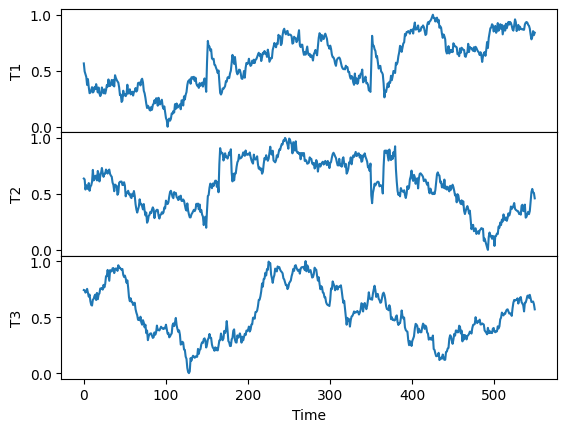

In [7]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
# plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

for i in range(df.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='10')
    axs[i].set_xlabel('Time', fontsize ='10')
    axs[i].plot(df[f'T{i + 1}'])

plt.show()

In [9]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

The motif pair matrix profile value in T1 is 1.1
The motif pair matrix profile value in T2 is 1.0
The motif pair matrix profile value in T3 is 1.1


In [17]:
ith_distance_profile = np.array([[0.4, 0.2, 0.6, 0.5, 0.2, 0.1, 0.9],
                                   [0.7, 0.1, 0.2, 0.6, 0.1, 0.2, 0.9],
                                   [0.6, 0.7, 0.1, 0.5, 0.8, 0.3, 0.4],
                                   [0.7, 0.4, 0.3, 0.1, 0.2, 0.1, 0.7]])

In [18]:
ith_distance_profile

array([[0.4, 0.2, 0.6, 0.5, 0.2, 0.1, 0.9],
       [0.7, 0.1, 0.2, 0.6, 0.1, 0.2, 0.9],
       [0.6, 0.7, 0.1, 0.5, 0.8, 0.3, 0.4],
       [0.7, 0.4, 0.3, 0.1, 0.2, 0.1, 0.7]])

In [19]:
d = 4

In [20]:
ith_matrix_profile = np.full(d, np.inf)
ith_indices = np.full(d, -1, dtype=np.int64)

for k in range(1, d):
    smallest_k = np.partition(ith_distance_profile, k, axis=0)[:k]  # retrieves the smallest k values in each column
    averaged_smallest_k = smallest_k.mean(axis=0)
    min_val = averaged_smallest_k.min()
    if min_val < ith_matrix_profile[k - 1]:
        ith_matrix_profile[k - 1] = min_val
        ith_indices[k - 1] = averaged_smallest_k.argmin()

In [21]:
ith_matrix_profile

array([0.1       , 0.1       , 0.13333333,        inf])